In [18]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [19]:
# fetch data 

main_data = pd.read_csv('Stars.csv')
main_data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.00,0.17,16.12,Red,M,0
1,3042,0.00,0.15,16.60,Red,M,0
2,2600,0.00,0.10,18.70,Red,M,0
3,2800,0.00,0.16,16.65,Red,M,0
4,1939,0.00,0.10,20.06,Red,M,0


In [20]:
main_data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [21]:
coded_data = pd.get_dummies(main_data, drop_first = True)
coded_data.head()

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.00,0.17,16.12,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3042,0.00,0.15,16.60,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2600,0.00,0.10,18.70,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2800,0.00,0.16,16.65,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1939,0.00,0.10,20.06,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [22]:
len(coded_data)
set(coded_data['Type'])

240

{0, 1, 2, 3, 4, 5}

Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Type')

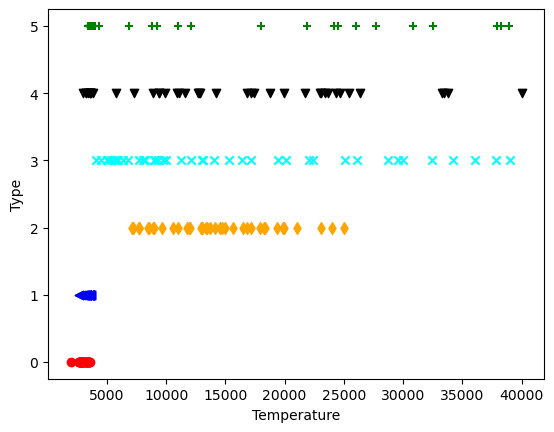

Text(0.5, 0, 'L')

Text(0, 0.5, 'Type')

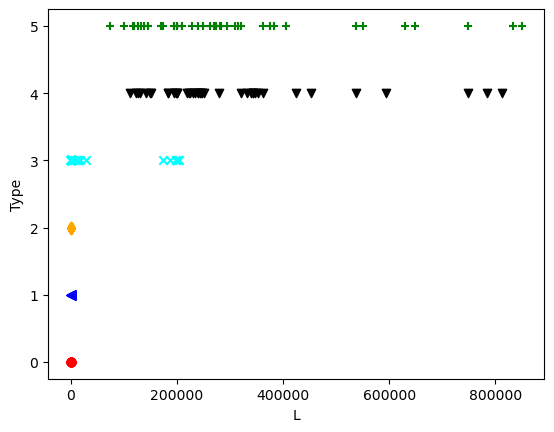

Text(0.5, 0, 'R')

Text(0, 0.5, 'Type')

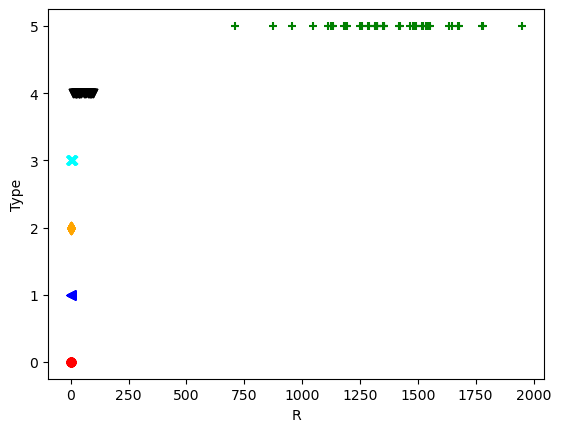

Text(0.5, 0, 'A_M')

Text(0, 0.5, 'Type')

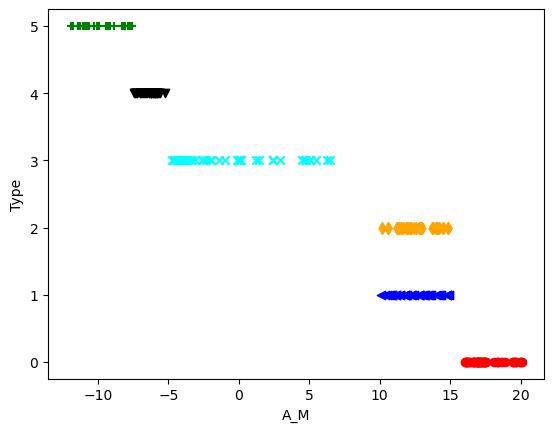

Text(0.5, 0, 'Color_Blue White')

Text(0, 0.5, 'Type')

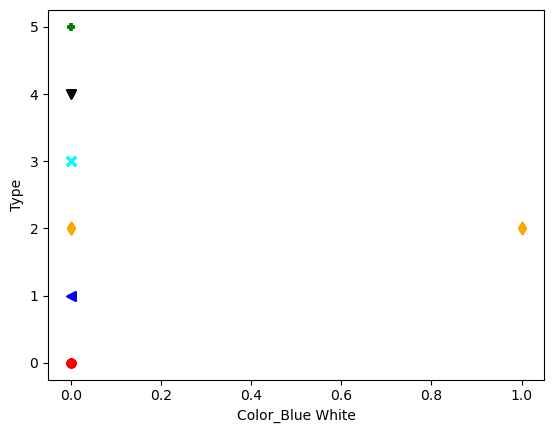

Text(0.5, 0, 'Color_Blue white')

Text(0, 0.5, 'Type')

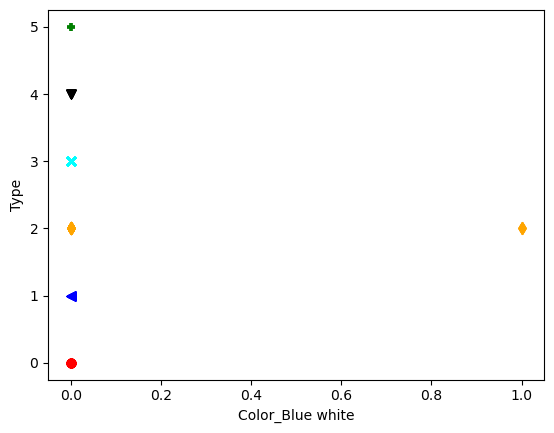

Text(0.5, 0, 'Color_Blue-White')

Text(0, 0.5, 'Type')

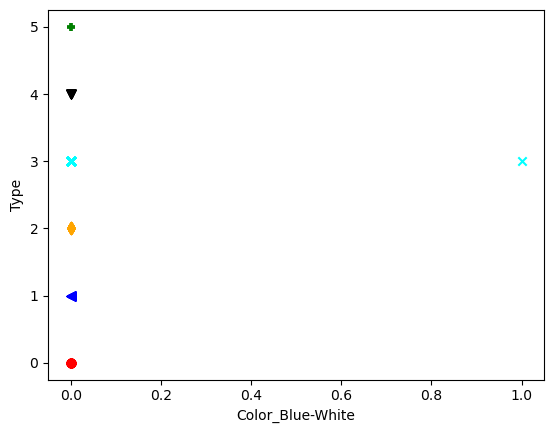

Text(0.5, 0, 'Color_Blue-white')

Text(0, 0.5, 'Type')

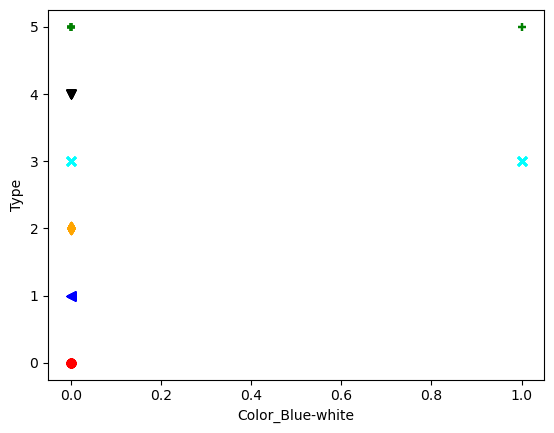

Text(0.5, 0, 'Color_Orange')

Text(0, 0.5, 'Type')

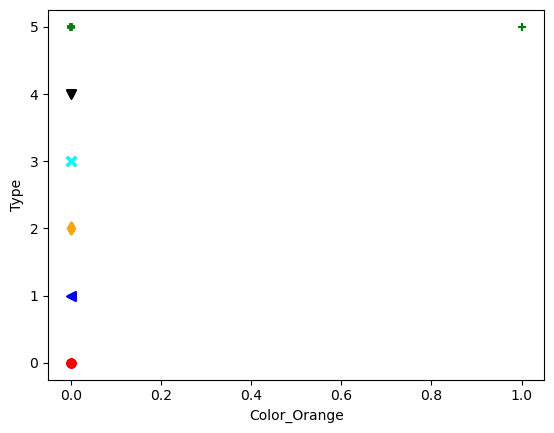

Text(0.5, 0, 'Color_Orange-Red')

Text(0, 0.5, 'Type')

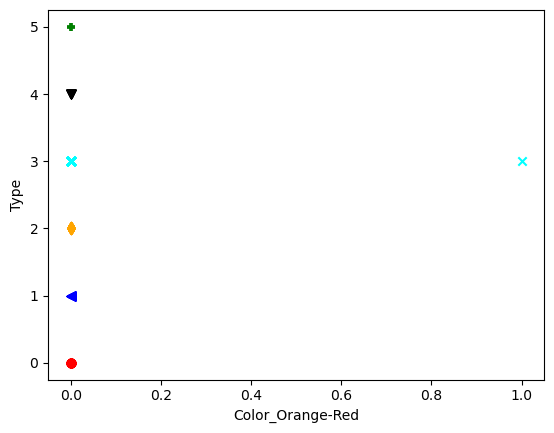

Text(0.5, 0, 'Color_Pale yellow orange')

Text(0, 0.5, 'Type')

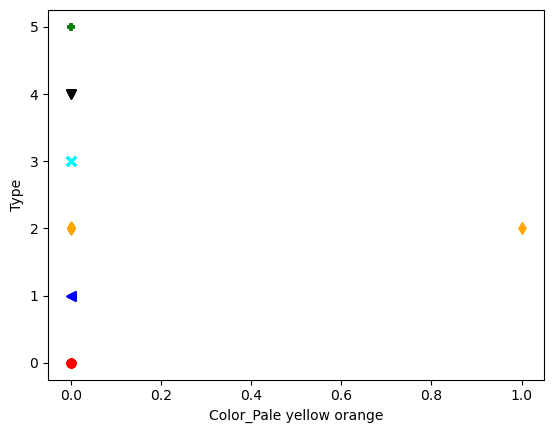

Text(0.5, 0, 'Color_Red')

Text(0, 0.5, 'Type')

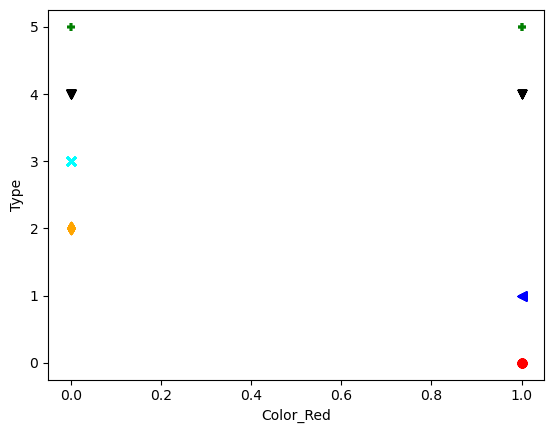

Text(0.5, 0, 'Color_White')

Text(0, 0.5, 'Type')

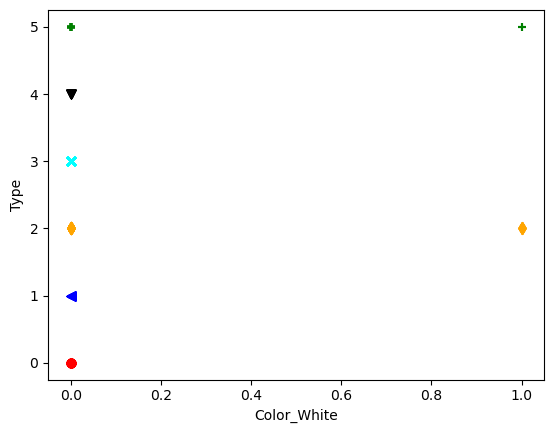

Text(0.5, 0, 'Color_White-Yellow')

Text(0, 0.5, 'Type')

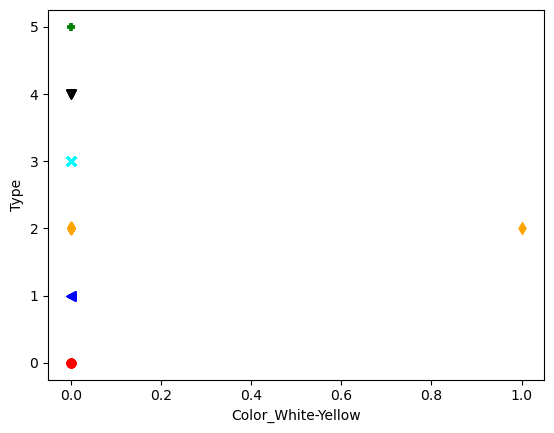

Text(0.5, 0, 'Color_Whitish')

Text(0, 0.5, 'Type')

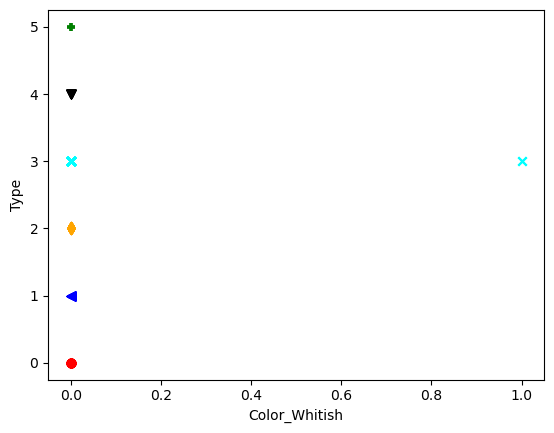

Text(0.5, 0, 'Color_Yellowish')

Text(0, 0.5, 'Type')

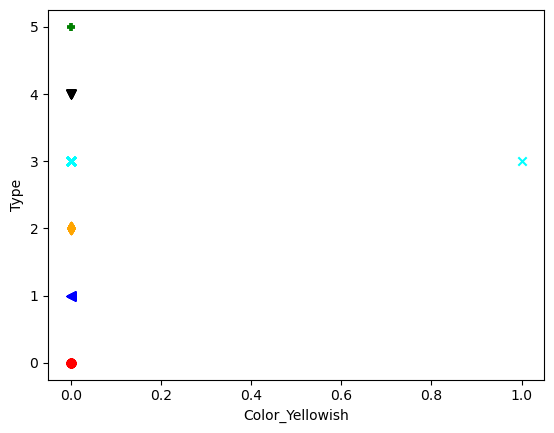

Text(0.5, 0, 'Color_Yellowish White')

Text(0, 0.5, 'Type')

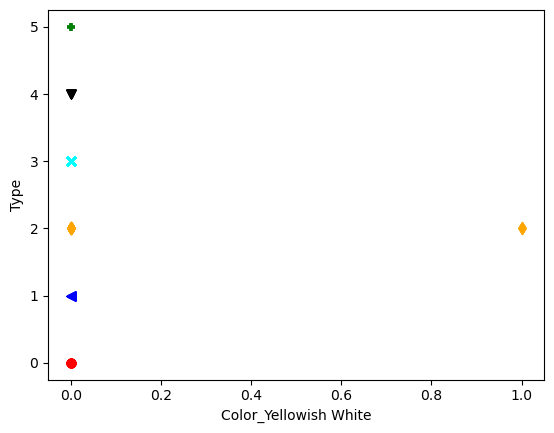

Text(0.5, 0, 'Color_white')

Text(0, 0.5, 'Type')

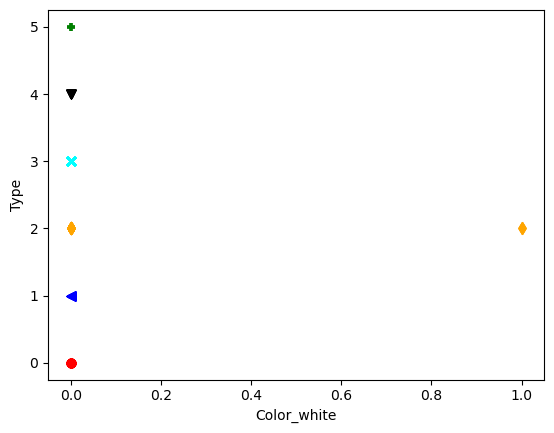

Text(0.5, 0, 'Color_yellow-white')

Text(0, 0.5, 'Type')

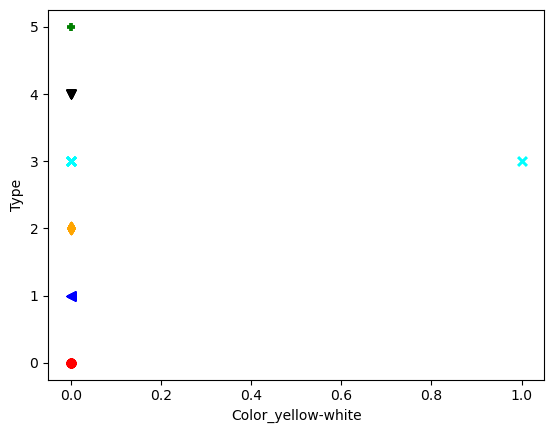

Text(0.5, 0, 'Color_yellowish')

Text(0, 0.5, 'Type')

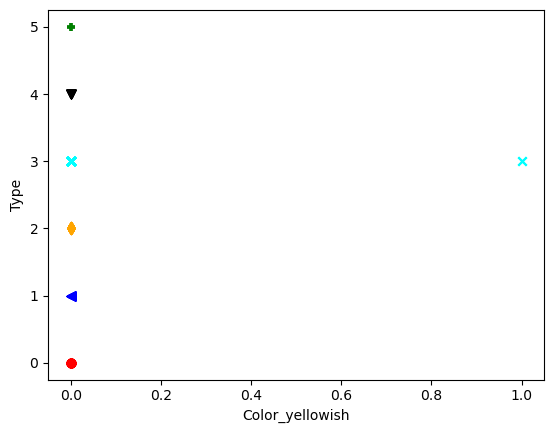

Text(0.5, 0, 'Spectral_Class_B')

Text(0, 0.5, 'Type')

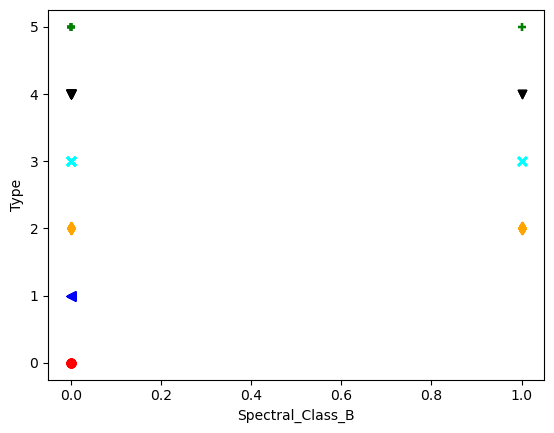

Text(0.5, 0, 'Spectral_Class_F')

Text(0, 0.5, 'Type')

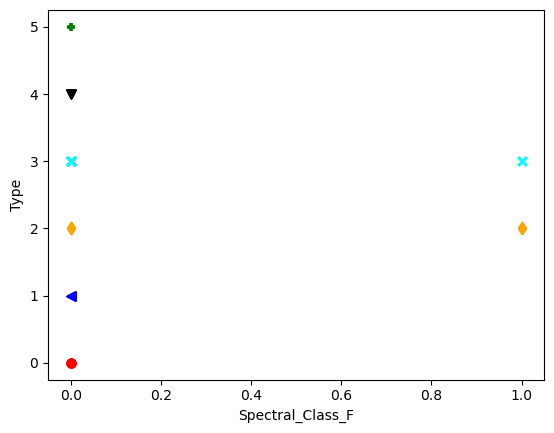

Text(0.5, 0, 'Spectral_Class_G')

Text(0, 0.5, 'Type')

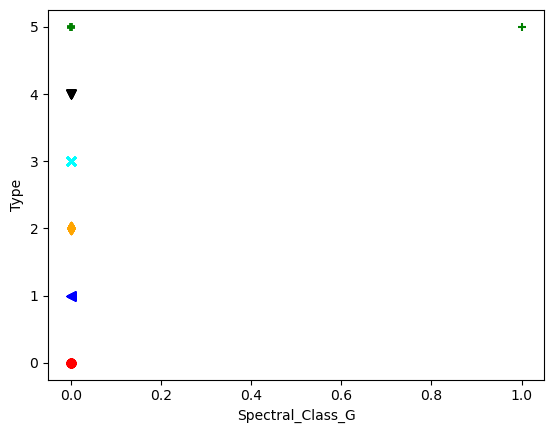

Text(0.5, 0, 'Spectral_Class_K')

Text(0, 0.5, 'Type')

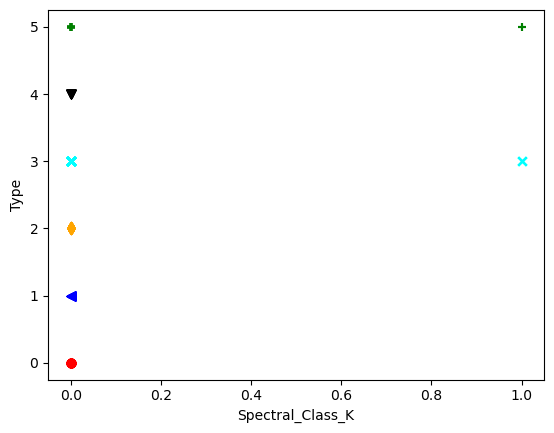

Text(0.5, 0, 'Spectral_Class_M')

Text(0, 0.5, 'Type')

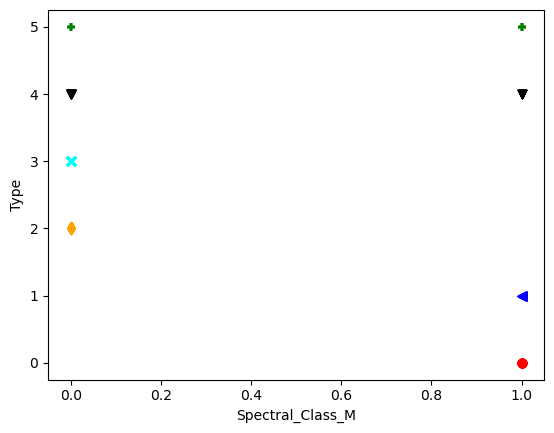

Text(0.5, 0, 'Spectral_Class_O')

Text(0, 0.5, 'Type')

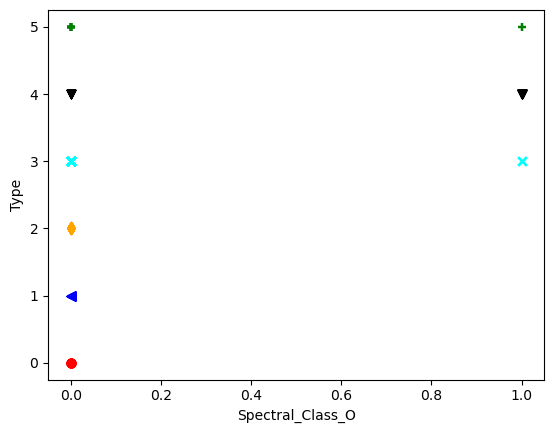

In [23]:
X0 = coded_data[coded_data['Type'] == 0]
X1 = coded_data[coded_data['Type'] == 1]
X2 = coded_data[coded_data['Type'] == 2]
X3 = coded_data[coded_data['Type'] == 3]
X4 = coded_data[coded_data['Type'] == 4]
X5 = coded_data[coded_data['Type'] == 5]

for col in coded_data.drop(columns=['Type']).columns: 
    plt.scatter(X0[col], X0['Type'], color = 'red', marker = 'o', label = 'Type 0')
    plt.scatter(X1[col], X1['Type'], color = 'blue', marker = '<', label = 'Type 1')
    plt.scatter(X2[col], X2['Type'], color = 'orange', marker = 'd', label = 'Type 2')
    plt.scatter(X3[col], X3['Type'], color = 'cyan', marker = 'x', label = 'Type 3')
    plt.scatter(X4[col], X4['Type'], color = 'black', marker = 'v', label = 'Type 4')
    plt.scatter(X5[col], X5['Type'], color = 'green', marker = '+', label = 'Type 5')
    plt.xlabel(col)
    plt.ylabel('Type')
    # plt.legend(loc='center right')
    plt.show()

In [24]:
# admission_data.isna().sum()
coded_data.isna().sum()

Temperature                 0
L                           0
R                           0
A_M                         0
Type                        0
Color_Blue White            0
Color_Blue white            0
Color_Blue-White            0
Color_Blue-white            0
Color_Orange                0
Color_Orange-Red            0
Color_Pale yellow orange    0
Color_Red                   0
Color_White                 0
Color_White-Yellow          0
Color_Whitish               0
Color_Yellowish             0
Color_Yellowish White       0
Color_white                 0
Color_yellow-white          0
Color_yellowish             0
Spectral_Class_B            0
Spectral_Class_F            0
Spectral_Class_G            0
Spectral_Class_K            0
Spectral_Class_M            0
Spectral_Class_O            0
dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(coded_data.drop(columns = ['Type']), coded_data['Type'], test_size=0.2, stratify = coded_data['Type'], random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train
y_test

,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
76,2890,0.00,0.24,13.46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
121,3531,0.00,0.10,19.94,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
165,7282,"131,000.00",24.00,-7.22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
98,12098,689.00,7.01,0.02,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
227,10930,"783,930.00",25.00,-6.22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,8250,9.25,1.93,-0.98,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
170,3570,"320,000.00","1,480.00",-7.58,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
158,13023,998.00,6.21,-1.38,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
134,3542,0.00,0.62,14.23,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
140,13420,0.00,0.01,13.67,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
91,4526,0.15,0.86,6.51,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
89,19860,0.00,0.01,11.34,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
197,3496,0.00,0.34,14.94,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
211,10012,552.00,5.86,0.01,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
202,14982,0.00,0.01,12.23,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
190,3462,0.01,0.15,11.47,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
175,3614,"145,000.00","1,553.00",-7.71,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
106,24630,"363,000.00",63.00,-5.83,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
24,16500,0.01,0.01,11.89,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


76     1
121    0
165    4
98     3
227    4
      ..
219    3
170    5
158    3
134    1
114    5
Name: Type, Length: 192, dtype: int64

140    2
91     3
89     2
197    1
211    3
202    2
190    1
175    5
106    4
24     2
239    5
176    5
101    4
95     3
70     1
162    4
6      0
180    0
182    0
84     2
210    3
184    0
183    0
228    4
196    1
44     4
169    4
152    3
61     0
173    5
122    0
57     5
232    5
142    2
12     1
104    4
4      0
94     3
111    5
206    2
200    2
139    1
236    5
36     3
166    4
71     1
30     3
10     1
Name: Type, dtype: int64

In [26]:
model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
# model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
# model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
# model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

/Users/saisrivishwanath/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='none',
                   solver='newton-cg')

1.0

array([[-1.20867575e-02, -1.10933433e-01, -1.49948431e+01,
         1.07481623e+01, -1.99835353e-04, -2.90639764e-04,
        -3.97338519e-05, -2.02010905e-05, -1.00864429e-13,
        -1.41774486e-04, -2.14003191e-02, -3.71916876e+01,
        -5.02604558e-02, -1.23661189e-01, -8.52190125e-05,
        -1.51929665e-04, -1.03247933e-03, -1.37628639e-04,
        -6.41561016e-04, -3.13048242e-04, -2.83696430e-04,
        -1.94593856e-01,  1.11272184e-12, -6.06752391e-04,
        -3.71916876e+01,  1.13403083e-09],
       [-7.89876306e-03,  8.88578439e-02,  1.51440498e+01,
        -4.98944473e+00, -2.07556633e-03, -7.84977775e-03,
        -1.48051268e-04, -1.42838225e-04, -1.01770326e-13,
        -3.14804796e-03, -2.45084543e-02,  3.80914486e+01,
        -5.52822586e-02, -3.13814298e-02, -3.93269138e-04,
        -4.39605521e-03, -1.44503358e-02, -2.52200109e-03,
        -1.01255655e-02, -1.24893643e-01, -1.54355141e-03,
        -1.06803419e-01,  1.12363707e-12, -1.32437746e-01,
         3.80

array([-3.73901338e+01,  3.78098208e+01, -4.31435407e+00,  3.91378107e+00,
        1.58235886e-02, -3.49375165e-02])

In [27]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Type'])
test_output.head()

,pred_Type
140,2
91,3
89,2
197,1
211,3


In [28]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,pred_Type,Type
140,2,2
91,3,3
89,2,2
197,1,1
211,3,3


Percentage of correct predictions is 
1.0


In [29]:
test_output = test_output.merge(X_test, left_index = True, right_index = True)
test_output.head()

,pred_Type,Type,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
140,2,2,13420,0.00,0.01,13.67,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
91,3,3,4526,0.15,0.86,6.51,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
89,2,2,19860,0.00,0.01,11.34,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
197,1,1,3496,0.00,0.34,14.94,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
211,3,3,10012,552.00,5.86,0.01,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [30]:
model.predict_proba(coded_data.drop(columns = ['Type']))

array([[9.99952328e-01, 4.76710066e-05, 1.92052136e-10, 2.34125949e-18,
        8.63817100e-15, 3.88005551e-10],
       [9.99999986e-01, 1.39100693e-08, 2.74711806e-13, 1.29326676e-21,
        1.62033214e-17, 1.14131367e-12],
       [1.00000000e+00, 2.00979142e-24, 8.47837311e-29, 8.32583532e-39,
        2.85561508e-31, 2.07667303e-25],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.14694922e-47, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.04853675e-35, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.82056860e-71, 1.00000000e+00]])

In [31]:
pd.DataFrame(model.predict_proba(coded_data.drop(columns = ['Type'])), columns = [0, 1, 2, 3, 4, 5])

,0,1,2,3,4,5
0,1.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
235,0.00,0.00,0.00,0.00,0.00,1.00
236,0.00,0.00,0.00,0.00,0.00,1.00
237,0.00,0.00,0.00,0.00,0.00,1.00
238,0.00,0.00,0.00,0.00,0.00,1.00


In [32]:
pd.DataFrame(model.predict_proba(coded_data.drop(columns = ['Type'])), columns = [0, 1, 2, 3, 4, 5]).max(axis = 1)
pd.DataFrame(model.predict_proba(coded_data.drop(columns = ['Type'])), columns = [0, 1, 2, 3, 4, 5]).idxmax(axis = 1)

0     1.00
1     1.00
2     1.00
3     1.00
4     1.00
      ... 
235   1.00
236   1.00
237   1.00
238   1.00
239   1.00
Length: 240, dtype: float64

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Length: 240, dtype: int64

In [33]:
data_with_prob = X_train.copy()
data_with_prob['Type'] = y_train
# Next we give the probability of predicting 1 (in multiclass, there will be probabilities by class)
data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Type'])).max(axis = 1)

# Notice that we are changing the probability to the one that was predicted
# data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Type']))[:,1]

data_with_prob.head()

,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,...,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Type,Probability
76,2890,0.00,0.24,13.46,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1,1.00
121,3531,0.00,0.10,19.94,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,0,1.00
165,7282,"131,000.00",24.00,-7.22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4,1.00
98,12098,689.00,7.01,0.02,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,3,1.00
227,10930,"783,930.00",25.00,-6.22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4,1.00


In [34]:
test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Type', 'pred_Type'])).max(axis = 1)
# Sane as abive here too
# test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Type', 'pred_Type']))[:,1]

test_output.head()

,pred_Type,Type,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Probability
140,2,2,13420,0.00,0.01,13.67,True,False,False,False,...,False,False,False,True,False,False,False,False,False,1.00
91,3,3,4526,0.15,0.86,6.51,False,False,False,False,...,False,False,True,False,False,False,True,False,False,1.00
89,2,2,19860,0.00,0.01,11.34,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1.00
197,1,1,3496,0.00,0.34,14.94,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.00
211,3,3,10012,552.00,5.86,0.01,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1.00
